# Interpolación polinomial
## Vandermonde, Lagrange, Diferencias divididas de Newton
### SCT 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementación de métodos de interpolación

In [2]:
def vandermonde(x_i, y_i):
    n = x_i.shape[-1]
    A = np.vander(x_i, increasing=True)
    a = np.linalg.solve(A, y_i)
    V = lambda x: np.dot(np.array([x ** i for i in range(n)]), a)
    return np.vectorize(V)

In [3]:
def lagrange(x_i, y_i):
    n = x_i.shape[-1]
    L = lambda x: np.dot(y_i, np.array([np.prod(x - np.delete(x_i, k)) 
                                        / np.prod(x_i[k] - np.delete(x_i, k)) for k in range(n)]))
    return np.vectorize(L)

In [4]:
def barycentric(x_i, y_i):
    n = x_i.shape[-1]
    w = 1 / np.array([np.prod(x_i[i] - np.delete(x_i, i)) for i in range(n)]) 
    b1 = lambda x: y_i[np.where(np.in1d(x_i, x))] 
    b2 = lambda x: np.dot(y_i, w /(x - x_i))/ np.dot(w, 1 / (x - x_i))
    B = lambda x: b1(x) if x in x_i else b2(x)
    return np.vectorize(B)

In [5]:
def newtonDD(x_i, y_i):
    n = x_i.shape[-1]
    pyramid = np.zeros((n, n)) # Create a square matrix to hold pyramid
    pyramid[:,0] = y_i # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x_i[i+j] - x_i[i])
    a = pyramid[0] # f[ ... ] coefficients
    N = lambda x: a[0] + np.dot(a[1:], np.array([np.prod(x - x_i[:i]) for i in range(1, n)]))
    return np.vectorize(N)

In [6]:
f1 = lambda x: 1 / (1 + 25 * x ** 2) # Runge Function
f2 = lambda x: np.piecewise(x, [np.abs(x) <= 1e-14], [1])

### Gráfico de funciones

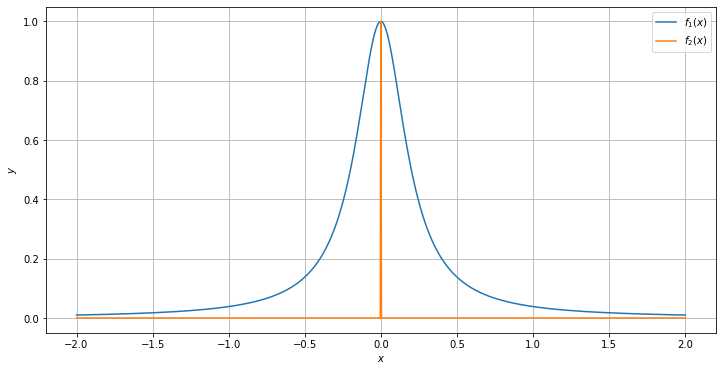

In [7]:
xx = np.linspace(-2, 2, 1001)
plt.figure(figsize=(12, 6))
plt.plot(xx, f1(xx), label=r"$f_1(x)$")
plt.plot(xx, f2(xx), label=r"$f_2(x)$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.grid(True)
plt.show()

Interpolación utilizando puntos de $f_1(x)$.

In [8]:
f = f1

In [9]:
N_i = 13
x_a, x_b = -1, 1
x_i = np.linspace(x_a, x_b, N_i)
y_i = f(x_i)

In [10]:
Pv = vandermonde(x_i, y_i)

In [11]:
Pl = lagrange(x_i, y_i)

In [12]:
Pb = barycentric(x_i, y_i)

In [13]:
Pn = newtonDD(x_i, y_i)

In [14]:
N_e = 500
x_e = np.linspace(x_a, x_b, N_e)
y_e = f(x_e)

### Gráfico de función y el resultado de interpolación

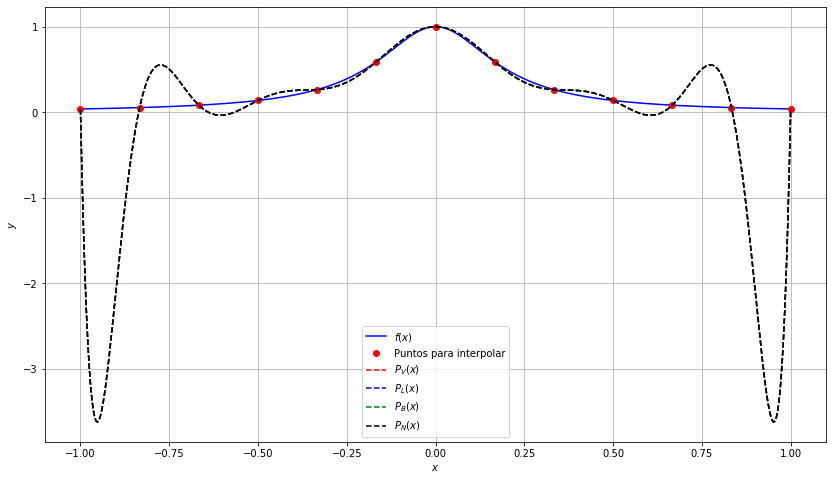

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(x_e, y_e, 'b-', label=r"$f(x)$")
plt.plot(x_i, y_i, 'ro', label="Puntos para interpolar")
plt.plot(x_e, Pv(x_e), 'r--', label=r'$P_V(x)$')
plt.plot(x_e, Pl(x_e), 'b--', label=r'$P_L(x)$')
plt.plot(x_e, Pb(x_e), 'g--', label=r'$P_B(x)$')
plt.plot(x_e, Pn(x_e), 'k--', label=r'$P_N(x)$')
plt.grid(True)
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Notamos como el interpolador efectivamente pasa por los puntos de interpolación, pero aparece el **Fenómeno de Runge**.

# Nodos de Chebyshev

Recordar que los puntos de Chebyshev se definen como:
\begin{equation}
    x_i = \cos\left(\frac{(2i - 1)\pi}{2n}\right), \quad i=1, \dots, n
\end{equation}

In [16]:
def chebyshevNodes(n):
    i = np.arange(1, n+1)
    t = (2*i - 1) * np.pi / (2 * n)
    return np.cos(t)

In [17]:
N_c = 13

In [18]:
xc_i = chebyshevNodes(N_c)

In [19]:
yc_i = f(xc_i)

### Puntos de Chebyshev

Visualización de algunos puntos...

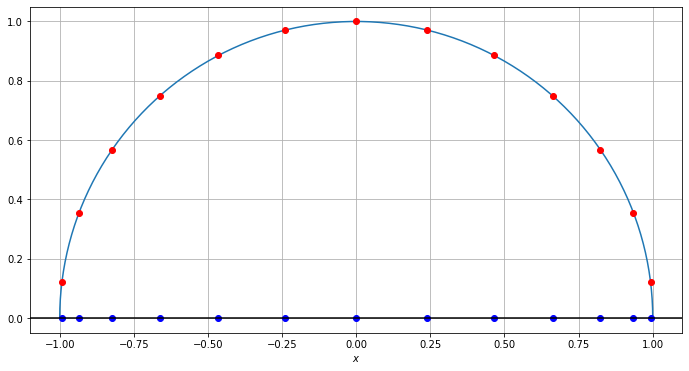

In [20]:
t = np.linspace(0, np.pi, 100)
plt.figure(figsize=(12, 6))
plt.plot(np.cos(t), np.sin(t))
plt.plot(xc_i, np.zeros(N_c), 'bo')
plt.plot(xc_i, xc_i * np.tan((2 * np.arange(1, N_c+1) - 1) * np.pi / (2 * N_c)), 'ro')
plt.axhline(y=0, color='k')
plt.axis('scaled')
plt.grid(True)
plt.xlabel(r"$x$")
plt.show()

### Obtención de polinomios utilizando los puntos de Chebyshev

In [21]:
Pv_c = vandermonde(xc_i, yc_i)

In [22]:
Pl_c = lagrange(xc_i, yc_i)

In [23]:
Pb_c = barycentric(xc_i, yc_i)

In [24]:
Pn_c = newtonDD(xc_i, yc_i)

In [25]:
xc_e = chebyshevNodes(500)

### Gráfico utilizando los puntos de Chebysev

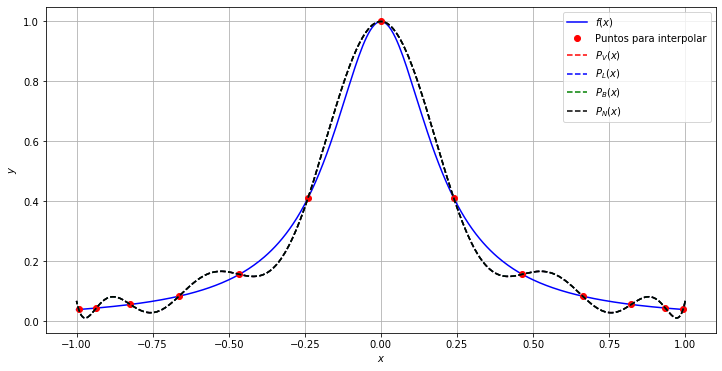

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(xc_e, f(xc_e), 'b-', label=r"$f(x)$")
plt.plot(xc_i, yc_i, 'ro', label="Puntos para interpolar")
plt.plot(xc_e, Pv_c(xc_e), 'r--', label=r'$P_V(x)$')
plt.plot(xc_e, Pl_c(xc_e), 'b--', label=r'$P_L(x)$')
plt.plot(xc_e, Pb_c(xc_e), 'g--', label=r'$P_B(x)$')
plt.plot(xc_e, Pn_c(xc_e), 'k--', label=r'$P_N(x)$')
plt.grid(True)
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

### Comparación interpoladores

Comparamos un error relativo entre el interpolador utilizando puntos equiespaciados y los de Chebyshev.

In [27]:
error = lambda y, p: np.linalg.norm(y - p, np.inf) / np.linalg.norm(y, np.inf)

In [28]:
print("Error puntos equiespaciados:", error(f(x_e), Pb(x_e))) # Equispaced points interpolation comparison
print("Error puntos Chebyshev:", error(f(x_e), Pb_c(x_e))) # Chebyshev points interpolation comparison

Error puntos equiespaciados: 3.663235759944772
Error puntos Chebyshev: 0.06919634037617944


# Conclusión

En este ejemplo/ejercicio se puede ver como afecta la calidad de la interpolación con el uso de puntos de Chebyshev en comparación a puntos equiespaciados.

# Referencias
* https://medium.com/@sddkal/newtons-divided-difference-method-for-polynomial-interpolation-4bc094ba90d7